In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [74]:
def shifted_hill(X, lambda_val):
    return (1 - lambda_val) * (1 / (1 + (X)**-2)) + lambda_val * (1 / (1 + (X)**2))

In [75]:
def model(y, t, params):
    miR200, ZEB_mRNA, ZEB, let7, LIN28_mRNA, LIN28, HIF1, AMPK = y

    g_mu200, k_mu200, g_mZ, k_mZ, g_Z, k_Z, g_muL, k_muL, g_L, k_L, g_HIF1, g_AMPK = params
    lambda_Z, lambda_S, lambda_HIF, lambda_AMPK = 0.1, 0.1, 0.5, 0.5  # lambda parameters

    # Hill functions for miR-200/ZEB and LIN28/let-7
    HS_minus_Z = shifted_hill(ZEB, lambda_Z)  # Inhibition of miR-200 by ZEB
    HS_minus_S = shifted_hill(1, lambda_S)  # SNAIL interaction with miR-200
    HS_plus_Z = shifted_hill(ZEB, 1)  # Self-activation of ZEB
    HS_minus_LIN28 = shifted_hill(LIN28, 1)  # Let-7 inhibition of LIN28
    HS_plus_HIF1 = shifted_hill(HIF1, lambda_HIF)  # HIF-1 effect on LIN28

    dmiR200_dt = g_mu200 * (1 - HS_minus_Z - HS_minus_S) - k_mu200 * miR200

    # ZEB (mRNA and protein)
    dZEB_mRNA_dt = g_mZ * (HS_plus_Z) - k_mZ * ZEB_mRNA
    dZEB_dt = g_Z * ZEB_mRNA * HS_minus_LIN28 - k_Z * ZEB

    #let-7
    dlet7_dt = g_muL * (1 - HS_minus_LIN28) - k_muL * let7

    # LIN28 (mRNA and protein)
    dLIN28_mRNA_dt = g_L - k_L * LIN28_mRNA + g_HIF1 * HS_plus_HIF1  # LIN28 is influenced by HIF-1
    dLIN28_dt = g_L * LIN28_mRNA - k_L * LIN28

    # HIF-1 dynamics
    dHIF1_dt = g_HIF1 * (1 - AMPK) - 0.1 * HIF1  # HIF-1 is influenced by AMPK

    # AMPK dynamics
    dAMPK_dt = g_AMPK * (1 - LIN28) - 0.1 * AMPK  # AMPK activity is modulated by LIN28

    return [dmiR200_dt, dZEB_mRNA_dt, dZEB_dt, dlet7_dt, dLIN28_mRNA_dt, dLIN28_dt, dHIF1_dt, dAMPK_dt]

In [76]:
# Initial concentrations for miR-200, ZEB mRNA, ZEB protein, let-7, LIN28 mRNA, LIN28, HIF-1, AMPK
y0 = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

# Parameters --???? EDIT values
params = [2100, 0.05, 11, 0.5, 100, 0.1, 200, 0.05, 100, 0.1, 22, 0.5]


In [77]:
t = np.linspace(0, 100, 500)

# Solve ODE system
solution = odeint(model, y0, t, args=(params,))
miR200, ZEB_mRNA, ZEB, let7, LIN28_mRNA, LIN28, HIF1, AMPK = solution.T


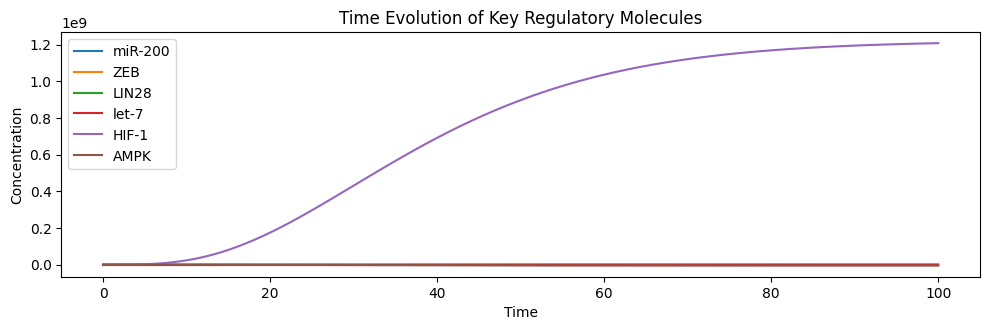

In [12]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, miR200, label="miR-200")
plt.plot(t, ZEB, label="ZEB")
plt.plot(t, LIN28, label="LIN28")
plt.plot(t, let7, label="let-7")
plt.plot(t, HIF1, label="HIF-1")
plt.plot(t, AMPK, label="AMPK")
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.title('Time Evolution of Key Regulatory Molecules')

plt.tight_layout()
plt.show()



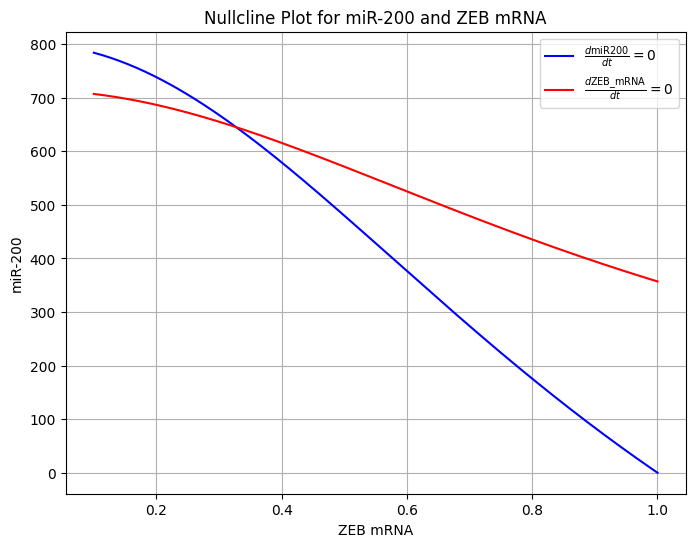

In [83]:
### NULLCLINES?
g_mu200 = 200  # Production rate of miR-200
k_mu200 = 0.1  # Degradation rate of miR-200
g_mZ = 100     # Production rate of ZEB mRNA
k_mZ = 0.14     # Degradation rate of ZEB mRNA
lambda_Z = 0.1 # Repression strength of ZEB on miR-200
lambda_S = 0.1  # SNAIL repression on miR-200


def nullcline_miR200(ZEB_mRNA):
    HS_minus_Z = shifted_hill(ZEB_mRNA, lambda_Z)
    HS_minus_S = shifted_hill(1, lambda_S)  # SNAIL interaction with miR-200
    return (g_mu200 * (1 - HS_minus_Z - HS_minus_S)) / k_mu200

def nullcline_ZEB_mRNA(miR200):
    HS_plus_Z = shifted_hill(miR200, 1)  # Self-activation of ZEB
    return (g_mZ * HS_plus_Z) / k_mZ

miR200_vals = np.linspace(0.1, 1, 200)  # Values for miR-200 (x-axis)
ZEB_mRNA_vals = np.linspace(0.1, 1, 200)  # Values for ZEB mRNA (y-axis)
miR200_nullcline = np.array([nullcline_miR200(Z) for Z in ZEB_mRNA_vals])  # miR-200 as a function of ZEB mRNA
ZEB_mRNA_nullcline = np.array([nullcline_ZEB_mRNA(M) for M in miR200_vals])  # ZEB mRNA as a function of miR-200

# Plotting the nullclines
plt.figure(figsize=(8, 6))
plt.plot(ZEB_mRNA_vals, miR200_nullcline, label=r'$\frac{d \text{miR200}}{dt} = 0$', color='blue')
plt.plot(miR200_vals, ZEB_mRNA_nullcline, label=r'$\frac{d \text{ZEB_mRNA}}{dt} = 0$', color='red')

plt.xlabel('ZEB mRNA')
plt.ylabel('miR-200')
plt.title('Nullcline Plot for miR-200 and ZEB mRNA')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-63-447363553c97>:6: RuntimeWarning: divide by zero encountered in scalar power
  return (1 - lambda_val) * (1 / (1 + X**-2)) + lambda_val * (1 / (1 + X**2))


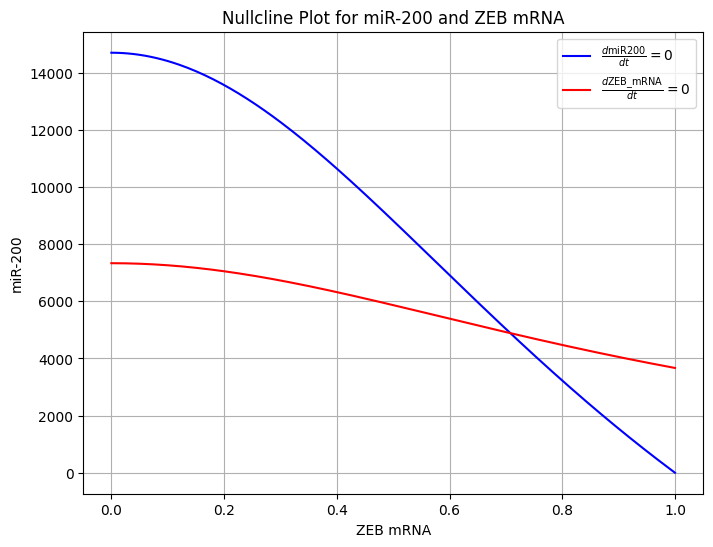

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Define the shifted Hill function for regulation
def shifted_hill(X, lambda_val):
    return (1 - lambda_val) * (1 / (1 + X**-2)) + lambda_val * (1 / (1 + X**2))

g_mu200 = 2100 # Production rate of miR-200
k_mu200 = 0.05  # Degradation rate of miR-200
g_mZ = 1100      # Production rate of ZEB mRNA
k_mZ = 0.15      # Degradation rate of ZEB mRNA
lambda_Z = 0.15  # Repression strength of ZEB on miR-200
lambda_S = 0.1  # SNAIL repression on miR-200

def nullcline_miR200(ZEB_mRNA):
    HS_minus_Z = shifted_hill(ZEB_mRNA, lambda_Z)
    HS_minus_S = shifted_hill(1, lambda_S)  # SNAIL interaction with miR-200
    return (g_mu200 * (1 - HS_minus_Z - HS_minus_S)) / k_mu200

def nullcline_ZEB_mRNA(miR200):
    HS_plus_Z = shifted_hill(miR200, 1)  # Self-activation of ZEB
    return (g_mZ * HS_plus_Z) / k_mZ

miR200_vals = np.linspace(0, 1, 200)  # Increased the range for better scaling
ZEB_mRNA_vals = np.linspace(0, 1, 200)  # Adjusted range for ZEB mRNA
miR200_nullcline = np.array([nullcline_miR200(Z) for Z in ZEB_mRNA_vals])  # miR-200 as a function of ZEB mRNA
ZEB_mRNA_nullcline = np.array([nullcline_ZEB_mRNA(M) for M in miR200_vals])  # ZEB mRNA as a function of miR-200

plt.figure(figsize=(8, 6))
plt.plot(ZEB_mRNA_vals, miR200_nullcline, label=r'$\frac{d \text{miR200}}{dt} = 0$', color='blue')
plt.plot(miR200_vals, ZEB_mRNA_nullcline, label=r'$\frac{d \text{ZEB_mRNA}}{dt} = 0$', color='red')

# Add the points corresponding to the phenotypic states (M, E/M, E)
# plt.scatter(0.1, 800, color='green', label='M (Mesenchymal)', zorder=5)
# plt.scatter(0.15, 500, color='black', label='E/M (Hybrid)', zorder=5)
# plt.scatter(0.25, 200, color='darkgreen', label='E (Epithelial)', zorder=5)

plt.xlabel('ZEB mRNA')
plt.ylabel('miR-200')
plt.title('Nullcline Plot for miR-200 and ZEB mRNA')
plt.legend()
plt.grid(True)
plt.show()


Fake nullcline Lmao

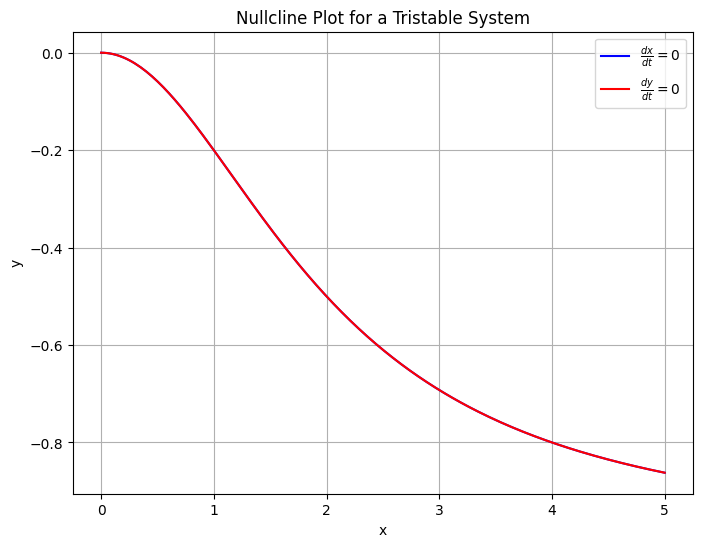

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Hill function for regulation
def hill(x, b, n):
    return 1 / (1 + (x / b) ** n)

# Parameters (adjust as needed to create tristability)
a1 = 1.0    # Production rate for x
a2 = 1.0    # Production rate for y
d1 = 1.0    # Degradation rate for x
d2 = 1.0    # Degradation rate for y
b1 = 2.0    # Half-maximal value for repression of x by y
b2 = 2.0    # Half-maximal value for repression of x by itself
b3 = 2.0    # Half-maximal value for repression of y by x
b4 = 2.0    # Half-maximal value for repression of y by itself
n = 2       # Hill coefficient

# Function for dx/dt = 0 (nullcline for x)
def nullcline_x(y):
    return a1 * hill(y, b1, n) - d1 * hill(0, b2, n)  # Set dx/dt = 0

# Function for dy/dt = 0 (nullcline for y)
def nullcline_y(x):
    return a2 * hill(x, b3, n) - d2 * hill(0, b4, n)  # Set dy/dt = 0

# Create a grid of x and y values
x_vals = np.linspace(0, 5, 200)
y_vals = np.linspace(0, 5, 200)

# Calculate nullclines
x_nullcline = np.array([nullcline_x(y) for y in y_vals])
y_nullcline = np.array([nullcline_y(x) for x in x_vals])

# Plotting the nullclines
plt.figure(figsize=(8, 6))

# Plot x-nullcline and y-nullcline
plt.plot(x_vals, x_nullcline, label=r"$\frac{dx}{dt} = 0$", color='blue')
plt.plot(y_vals, y_nullcline, label=r"$\frac{dy}{dt} = 0$", color='red')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nullcline Plot for a Tristable System')
plt.legend()
plt.grid(True)
plt.show()


Using params from other paper

<ipython-input-71-155ec745b77c>:6: RuntimeWarning: divide by zero encountered in scalar power
  return (1 - lambda_val) * (1 / (1 + X**-n)) + lambda_val * (1 / (1 + X**n))


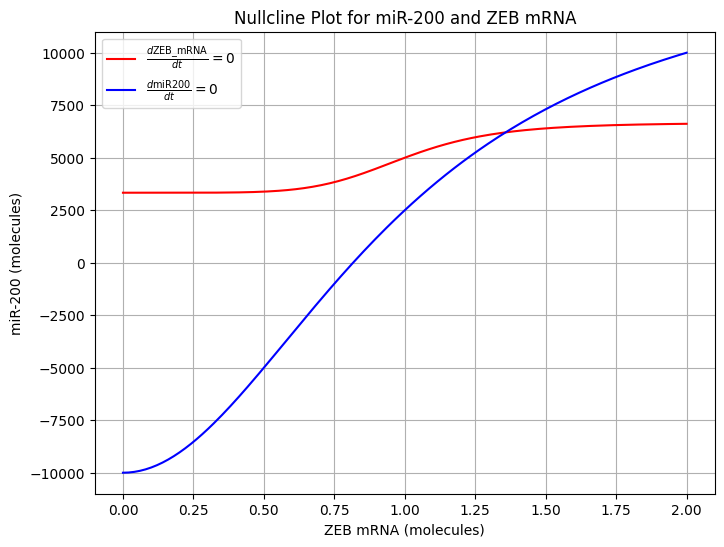

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Hill function
def shifted_hill(X, lambda_val, n):
    return (1 - lambda_val) * (1 / (1 + X**-n)) + lambda_val * (1 / (1 + X**n))

# Parameters from the paper
g_m2 = 500   # Production rate of miR-200
k_m2 = 0.1  # Degradation rate of miR-200
g_Z = 1000   # Production rate of ZEB
k_Z = 0.1   # Degradation rate of ZEB
lambda_Z = 3  # Fold change for ZEB self-activation
n_Z = 2       # Hill coefficient for ZEB self-activation
lambda_m2Z = 1/3  # Fold change for ZEB inhibition
n_m2Z = 6         # Hill coefficient for ZEB inhibition

# Function for miR-200 nullcline (dmiR200/dt = 0)
def nullcline_miR200(ZEB_mRNA):
    HS_minus_Z = shifted_hill(ZEB_mRNA, lambda_Z, n_Z)  # ZEB repression of miR-200
    return (g_m2 * (1 - HS_minus_Z)) / k_m2

# Function for ZEB mRNA nullcline (dZEB_mRNA/dt = 0)
def nullcline_ZEB_mRNA(miR200):
    HS_plus_Z = shifted_hill(miR200, lambda_m2Z, n_m2Z)  # miR-200 inhibition of ZEB
    return (g_Z * HS_plus_Z) / k_Z

# Create a grid for miR-200 and ZEB mRNA values
miR200_vals = np.linspace(0, 2, 200)  # Range for miR-200 (x-axis)
ZEB_mRNA_vals = np.linspace(0, 2, 200)  # Range for ZEB mRNA (y-axis)

# Compute the nullcline for miR-200 and ZEB mRNA
miR200_nullcline = np.array([nullcline_miR200(Z) for Z in ZEB_mRNA_vals])  # miR-200 as a function of ZEB mRNA
ZEB_mRNA_nullcline = np.array([nullcline_ZEB_mRNA(M) for M in miR200_vals])  # ZEB mRNA as a function of miR-200

# Plotting the nullclines
plt.figure(figsize=(8, 6))

# Plot x-nullcline (miR-200) and y-nullcline (ZEB mRNA)

plt.plot(miR200_vals, ZEB_mRNA_nullcline, label=r'$\frac{d \text{ZEB_mRNA}}{dt} = 0$', color='red')
plt.plot(ZEB_mRNA_vals, miR200_nullcline, label=r'$\frac{d \text{miR200}}{dt} = 0$', color='blue')

# Add the points corresponding to the phenotypic states (M, E/M, E)
# plt.scatter(5, 800, color='green', label='M (Mesenchymal)', zorder=5)
# plt.scatter(10, 500, color='black', label='E/M (Hybrid)', zorder=5)
# plt.scatter(20, 200, color='darkgreen', label='E (Epithelial)', zorder=5)

# Labels and Title
plt.xlabel('ZEB mRNA (molecules)')
plt.ylabel('miR-200 (molecules)')
plt.title('Nullcline Plot for miR-200 and ZEB mRNA')
plt.legend()
plt.grid(True)
plt.show()
